
✅ Evaluation Metrics:
RMSE: 1.324
R² Score: 0.254


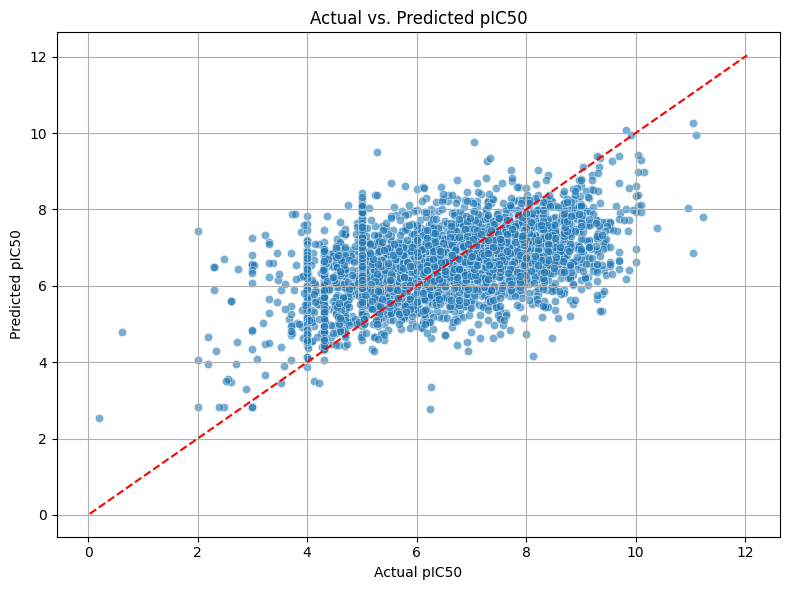


🎉 Model saved as 'dti_rf_model.pkl'


In [ ]:
# ---------------------
# 1. Import Libraries
# ---------------------
import pandas as pd
import numpy as np
from rdkit import Chem
from rdkit.Chem import Descriptors
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# ---------------------
# 2. Load Dataset
# ---------------------
file_path = "/content/chembl_data.csv"

df = pd.read_csv(file_path, sep=';', engine='python', on_bad_lines='skip')
# ---------------------
# 3. Initial Filtering
# ---------------------
# Keep only rows with IC50 in nM
df = df[df['Standard Type'].str.upper() == 'IC50']
df = df[df['Standard Units'].str.lower() == 'nm']

# Drop rows with missing values in key fields
df = df.dropna(subset=['Smiles', 'Standard Value'])

# Remove invalid or zero/negative values
df = df[df['Standard Value'] > 0]

# ---------------------
# 4. Convert IC50 to pIC50
# ---------------------
df['pIC50'] = df['Standard Value'].apply(lambda x: -np.log10(x * 1e-9))

# ---------------------
# 5. Generate Molecular Descriptors
# ---------------------
def compute_descriptors(smiles):
    mol = Chem.MolFromSmiles(smiles)
    if mol is None:
        return None
    return {
        'MolWt': Descriptors.MolWt(mol),
        'LogP': Descriptors.MolLogP(mol),
        'HDonors': Descriptors.NumHDonors(mol),
        'HAcceptors': Descriptors.NumHAcceptors(mol),
        'TPSA': Descriptors.TPSA(mol),
        'NumRotatableBonds': Descriptors.NumRotatableBonds(mol)
    }

desc = df['Smiles'].apply(compute_descriptors)
desc_df = pd.DataFrame(desc.tolist())

# Drop rows where descriptor generation failed
df = df.reset_index(drop=True)
desc_df = desc_df.dropna()
df = df.loc[desc_df.index].reset_index(drop=True)
desc_df = desc_df.reset_index(drop=True)

# Combine data
df_final = pd.concat([df, desc_df], axis=1)

# ---------------------
# 6. Prepare Features and Labels
# ---------------------
X = df_final[['MolWt', 'LogP', 'HDonors', 'HAcceptors', 'TPSA', 'NumRotatableBonds']]
y = df_final['pIC50']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ---------------------
# 7. Train Random Forest Regressor
# ---------------------
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# ---------------------
# 8. Evaluate the Model
# ---------------------
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"\n✅ Evaluation Metrics:")
print(f"RMSE: {rmse:.3f}")
print(f"R² Score: {r2:.3f}")

# ---------------------
# 9. Visualization
# ---------------------
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.xlabel("Actual pIC50")
plt.ylabel("Predicted pIC50")
plt.title("Actual vs. Predicted pIC50")
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.grid(True)
plt.tight_layout()
plt.show()

# ---------------------
# 10. Optional: Save Model
# ---------------------
import joblib
joblib.dump(model, "dti_rf_model.pkl")
print("\n🎉 Model saved as 'dti_rf_model.pkl'")


In [ ]:
!pip install xgboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 253.9/253.9 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.4/322.4 MB 3.3 MB/s eta 0:00:00


In [ ]:
!pip uninstall -y numpy
!pip install numpy==1.24.4 --force-reinstall
!pip uninstall -y rdkit-pypi
!pip install rdkit-pypi --force-reinstall

Found existing installation: numpy 1.24.4
Uninstalling numpy-1.24.4:
  Successfully uninstalled numpy-1.24.4
  Using cached numpy-1.24.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (5.6 kB)
Using cached numpy-1.24.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (17.3 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 2.3.0 which is incompatible.
jaxlib 0.5.1 requires numpy>=1.25, but you have numpy 1.24.4 which is incompatible.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.24.4 which is incompatible.
jax 0.5.2 requires numpy>=1.25, but you have numpy 1.24.4 which is incompatible.
treescope 0.1.9 requires numpy>=1.25.2, but you have numpy 1.24.4 which is incompatible.


Found existing installation: rdkit-pypi 2022.9.5
Uninstalling rdkit-pypi-2022.9.5:
  Successfully uninstalled rdkit-pypi-2022.9.5
  Using cached rdkit_pypi-2022.9.5-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (3.9 kB)
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/pip/_internal/cli/base_command.py", line 179, in exc_logging_wrapper
    status = run_func(*args)
             ^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pip/_internal/cli/req_command.py", line 67, in wrapper
^C


ValueError: numpy.dtype size changed, may indicate binary incompatibility. Expected 96 from C header, got 88 from PyObject

In [ ]:
!pip install RDKit



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.2/35.2 MB 43.6 MB/s eta 0:00:00


Streaming output truncated to the last 5000 lines.
[15:58:32] DEPRECATION WARNING: please use MorganGenerator
[15:58:32] DEPRECATION WARNING: please use MorganGenerator
[15:58:32] DEPRECATION WARNING: please use MorganGenerator
[15:58:32] DEPRECATION WARNING: please use MorganGenerator
[15:58:32] DEPRECATION WARNING: please use MorganGenerator
[15:58:32] DEPRECATION WARNING: please use MorganGenerator
[15:58:32] DEPRECATION WARNING: please use MorganGenerator
[15:58:32] DEPRECATION WARNING: please use MorganGenerator
[15:58:32] DEPRECATION WARNING: please use MorganGenerator
[15:58:32] DEPRECATION WARNING: please use MorganGenerator
[15:58:32] DEPRECATION WARNING: please use MorganGenerator
[15:58:32] DEPRECATION WARNING: please use MorganGenerator
[15:58:32] DEPRECATION WARNING: please use MorganGenerator
[15:58:32] DEPRECATION WARNING: please use MorganGenerator
[15:58:32] DEPRECATION WARNING: please use MorganGenerator
[15:58:32] DEPRECATION WARNING: please use MorganGenerator
[15:5


📊 Morgan Fingerprints + XGBoost Results
RMSE: 1.118
R² Score: 0.455


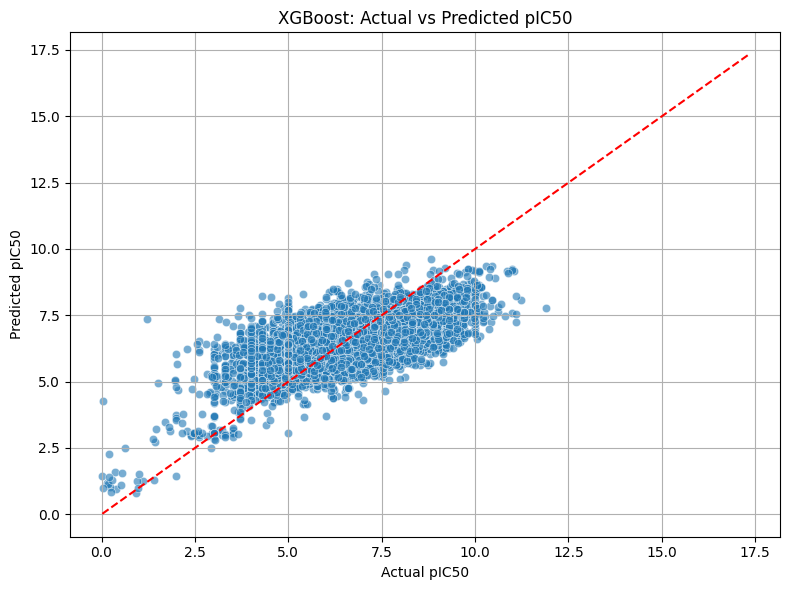

In [ ]:
# -------------------------------
# 1. Import Libraries
# -------------------------------
import pandas as pd
import numpy as np
from rdkit import Chem
from rdkit.Chem import AllChem
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import xgboost as xgb
import matplotlib.pyplot as plt
import seaborn as sns

# -------------------------------
# 2. Load and Preprocess Data
# -------------------------------
file_path = "/content/chembl_data.csv"  # your file
df = pd.read_csv(file_path, sep=';', engine='python', on_bad_lines='skip')

# Filter to IC50 only
df = df[df['Standard Type'].str.upper() == 'IC50']
df = df[df['Standard Units'].str.lower() == 'nm']
df = df.dropna(subset=['Smiles', 'Standard Value'])
df = df[df['Standard Value'] > 0]

# Convert IC50 to pIC50
df['pIC50'] = df['Standard Value'].apply(lambda x: -np.log10(x * 1e-9))

# -------------------------------
# 3. Generate Morgan Fingerprints
# -------------------------------
from rdkit import DataStructs

def mol_from_smiles(smiles):
    try:
        return Chem.MolFromSmiles(smiles)
    except:
        return None

def smiles_to_morgan_fp(smiles, radius=2, nBits=2048):
    mol = mol_from_smiles(smiles)
    if mol is None:
        return None
    fp = AllChem.GetMorganFingerprintAsBitVect(mol, radius, nBits=nBits)
    arr = np.zeros((1,), dtype=int)
    DataStructs.ConvertToNumpyArray(fp, arr)
    return arr

fps = df['Smiles'].apply(smiles_to_morgan_fp)
fps = fps.dropna()

# Align dataframe with valid fingerprints only
df = df.loc[fps.index].reset_index(drop=True)
X = np.stack(fps.values)
y = df['pIC50'].values

# -------------------------------
# 4. Train/Test Split
# -------------------------------
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# -------------------------------
# 5. Train XGBoost Regressor
# -------------------------------
model = xgb.XGBRegressor(n_estimators=300, max_depth=6, learning_rate=0.05, subsample=0.8, colsample_bytree=0.8, random_state=42)
model.fit(X_train, y_train)

# -------------------------------
# 6. Evaluate Model
# -------------------------------
y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"\n📊 Morgan Fingerprints + XGBoost Results")
print(f"RMSE: {rmse:.3f}")
print(f"R² Score: {r2:.3f}")

# -------------------------------
# 7. Visualization
# -------------------------------
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.xlabel("Actual pIC50")
plt.ylabel("Predicted pIC50")
plt.title("XGBoost: Actual vs Predicted pIC50")
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
!pip install torch-geometric


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.1/63.1 kB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 19.3 MB/s eta 0:00:00


In [ ]:
# Required libraries for GNN data preparation
import pandas as pd
from rdkit import Chem
from rdkit.Chem import AllChem
from torch_geometric.data import Data
import torch

# Load dataset
df = pd.read_csv("/content/chembl_data.csv", sep=';', low_memory=False)

# Drop rows with missing SMILES or target values
df = df[['Smiles', 'Standard Value']].dropna()

# Limit to a smaller number of rows for quick testing
df = df.sample(500, random_state=42)

# Atom features function
def atom_features(atom):
    return torch.tensor([
        atom.GetAtomicNum(),
        atom.GetTotalDegree(),
        atom.GetFormalCharge(),
        atom.GetHybridization().real,
        atom.GetIsAromatic()
    ], dtype=torch.float)

# Convert molecule to graph
def mol_to_graph(smiles, target):
    mol = Chem.MolFromSmiles(smiles)
    if mol is None:
        return None
    # Add hydrogens and compute 2D coordinates
    mol = Chem.AddHs(mol)
    AllChem.EmbedMolecule(mol, AllChem.ETKDG())

    # Nodes
    x = torch.stack([atom_features(atom) for atom in mol.GetAtoms()])

    # Edges
    edge_index = []
    for bond in mol.GetBonds():
        start = bond.GetBeginAtomIdx()
        end = bond.GetEndAtomIdx()
        edge_index.append([start, end])
        edge_index.append([end, start])  # bidirectional

    edge_index = torch.tensor(edge_index, dtype=torch.long).t().contiguous()

    y = torch.tensor([target], dtype=torch.float)
    return Data(x=x, edge_index=edge_index, y=y)

# Apply the conversion
dataset = []
for i, row in df.iterrows():
    graph = mol_to_graph(row['Smiles'], row['Standard Value'])
    if graph:
        dataset.append(graph)

# Number of graph data objects created
print(f"Graphs created: {len(dataset)}")


Graphs created: 500


In [ ]:
!pip install rdkit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.2/35.2 MB 52.4 MB/s eta 0:00:00


In [ ]:
import pandas as pd
from rdkit import Chem

df = pd.read_csv('/content/chembl_data.csv', delimiter=';', on_bad_lines='skip')

print("Columns:", df.columns.tolist())

df = df[['Smiles', 'Value']]

df = df.dropna(subset=['Smiles', 'Value'])

df['Value'] = pd.to_numeric(df['Value'], errors='coerce')
df = df.dropna(subset=['Value'])

df = df[df['Value'] > 0]

def is_valid_smiles(s):
    return Chem.MolFromSmiles(s) is not None

df['valid'] = df['Smiles'].apply(is_valid_smiles)
df = df[df['valid']]
df = df.drop(columns=['valid'])

df = df.reset_index(drop=True)

print(f"Preprocessed dataset size: {df.shape}")
print(df.head())


<ipython-input-6-1434282864>:4: DtypeWarning: Columns (46) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/chembl_data.csv', delimiter=';', on_bad_lines='skip')


Columns: ['Molecule ChEMBL ID', 'Molecule Name', 'Molecule Max Phase', 'Molecular Weight', '#RO5 Violations', 'AlogP', 'Compound Key', 'Smiles', 'Standard Type', 'Standard Relation', 'Standard Value', 'Standard Units', 'pChEMBL Value', 'Data Validity Comment', 'Comment', 'Uo Units', 'Ligand Efficiency BEI', 'Ligand Efficiency LE', 'Ligand Efficiency LLE', 'Ligand Efficiency SEI', 'Potential Duplicate', 'Assay ChEMBL ID', 'Assay Description', 'Assay Type', 'BAO Format ID', 'BAO Label', 'Assay Organism', 'Assay Tissue ChEMBL ID', 'Assay Tissue Name', 'Assay Cell Type', 'Assay Subcellular Fraction', 'Assay Parameters', 'Assay Variant Accession', 'Assay Variant Mutation', 'Target ChEMBL ID', 'Target Name', 'Target Organism', 'Target Type', 'Document ChEMBL ID', 'Source ID', 'Source Description', 'Document Journal', 'Document Year', 'Cell ChEMBL ID', 'Properties', 'Action Type', 'Standard Text Value', 'Value']
Preprocessed dataset size: (131965, 2)
                                          

In [ ]:
!pip install rdkit-pypi torch-geometric

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.1/63.1 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.4/29.4 MB 68.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 56.1 MB/s eta 0:00:00


In [ ]:
!pip install numpy<2.0 --force-reinstall

/bin/bash: line 1: 2.0: No such file or directory


In [ ]:
import torch
from torch_geometric.data import Data
from rdkit.Chem import rdmolops

def mol_to_graph_data_obj(smiles, value):
    mol = Chem.MolFromSmiles(smiles)
    if mol is None:
        return None

    mol = Chem.AddHs(mol)
    num_atoms = mol.GetNumAtoms()

    # Node features: atomic number
    atom_features = []
    for atom in mol.GetAtoms():
        atom_features.append([atom.GetAtomicNum()])
    x = torch.tensor(atom_features, dtype=torch.float)

    # Edge index and edge attributes
    edge_index = []
    edge_attr = []

    for bond in mol.GetBonds():
        start = bond.GetBeginAtomIdx()
        end = bond.GetEndAtomIdx()
        bond_type = bond.GetBondTypeAsDouble()

        # Undirected graph: add both directions
        edge_index += [[start, end], [end, start]]
        edge_attr += [[bond_type], [bond_type]]

    edge_index = torch.tensor(edge_index, dtype=torch.long).t().contiguous()
    edge_attr = torch.tensor(edge_attr, dtype=torch.float)

    # Target value
    y = torch.tensor([value], dtype=torch.float)

    data = Data(x=x, edge_index=edge_index, edge_attr=edge_attr, y=y, smiles=smiles)
    return data


In [ ]:
graph_list = []

for i, row in df.iterrows():
    data = mol_to_graph_data_obj(row['Smiles'], row['Value'])
    if data is not None:
        graph_list.append(data)

print(f"Converted {len(graph_list)} molecules to graph data.")


Converted 131965 molecules to graph data.


In [ ]:
from torch.utils.data import random_split

torch.manual_seed(42)

total_size = len(graph_list)
train_size = int(0.8 * total_size)
val_size = int(0.1 * total_size)
test_size = total_size - train_size - val_size

train_data, val_data, test_data = random_split(graph_list, [train_size, val_size, test_size])

print(f"Train: {len(train_data)}, Val: {len(val_data)}, Test: {len(test_data)}")


Train: 105572, Val: 13196, Test: 13197


In [ ]:
from torch_geometric.loader import DataLoader

batch_size = 32

train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_data, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_data, batch_size=batch_size, shuffle=False)

In [ ]:
import torch.nn as nn
import torch.nn.functional as F
from torch_geometric.nn import GCNConv, global_mean_pool

class GCN(nn.Module):
    def __init__(self, hidden_channels=64):
        super(GCN, self).__init__()
        self.conv1 = GCNConv(1, hidden_channels)
        self.conv2 = GCNConv(hidden_channels, hidden_channels)
        self.lin = nn.Linear(hidden_channels, 1)

    def forward(self, data):
        x, edge_index, edge_attr, batch = data.x, data.edge_index, data.edge_attr, data.batch

        x = self.conv1(x, edge_index)
        x = F.relu(x)
        x = self.conv2(x, edge_index)
        x = F.relu(x)

        x = global_mean_pool(x, batch)
        x = self.lin(x)
        return x


In [ ]:
import torch
from torch.optim import Adam
import torch.nn.functional as F

# Initialize model, optimizer, and loss
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = GCN().to(device)
optimizer = Adam(model.parameters(), lr=0.001)
criterion = torch.nn.MSELoss()


In [ ]:
def train(model, loader):
    model.train()
    total_loss = 0
    for batch in loader:
        batch = batch.to(device)
        optimizer.zero_grad()
        out = model(batch).squeeze()
        loss = criterion(out, batch.y)
        loss.backward()
        optimizer.step()
        total_loss += loss.item() * batch.num_graphs
    return total_loss / len(loader.dataset)

def evaluate(model, loader):
    model.eval()
    total_loss = 0
    with torch.no_grad():
        for batch in loader:
            batch = batch.to(device)
            out = model(batch).squeeze()
            loss = criterion(out, batch.y)
            total_loss += loss.item() * batch.num_graphs
    return total_loss / len(loader.dataset)


In [ ]:
epochs = 20

for epoch in range(1, epochs + 1):
    train_loss = train(model, train_loader)
    val_loss = evaluate(model, val_loader)
    print(f"Epoch {epoch:02d}, Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}")


Epoch 01, Train Loss: 12520642313862.3262, Val Loss: 26049728239769.0078
Epoch 02, Train Loss: 12520585749048.6328, Val Loss: 26049558438115.6289
Epoch 03, Train Loss: 12520471270162.2207, Val Loss: 26049263098294.0664
Epoch 04, Train Loss: 12520312209735.8711, Val Loss: 26048872683880.2656
Epoch 05, Train Loss: 12520098022550.6680, Val Loss: 26048363833958.6836
Epoch 06, Train Loss: 12519895009400.0527, Val Loss: 26047888652011.0859
Epoch 07, Train Loss: 12519719204036.7383, Val Loss: 26047458584237.7852
Epoch 08, Train Loss: 12519533821741.8965, Val Loss: 26046981561718.2617
Epoch 09, Train Loss: 12519413763495.5312, Val Loss: 26046628519478.4766
Epoch 10, Train Loss: 12519305598322.6641, Val Loss: 26046285374345.8945
Epoch 11, Train Loss: 12519223193967.1055, Val Loss: 26046015696841.3711
Epoch 12, Train Loss: 12519165707005.9043, Val Loss: 26045786098657.5820
Epoch 13, Train Loss: 12519137050190.9297, Val Loss: 26045641816678.2773
Epoch 14, Train Loss: 12519110113801.3359, Val Loss

In [ ]:
test_loss = evaluate(model, test_loader)
print(f"\nTest MSE: {test_loss:.4f}")



Test MSE: 4877503155421.7324


In [ ]:
import pandas as pd
import numpy as np
from rdkit import Chem
from rdkit.Chem import AllChem

import torch
from torch_geometric.data import Data
from torch_geometric.loader import DataLoader
from torch_geometric.nn import GINConv, global_mean_pool
import torch.nn.functional as F
from sklearn.model_selection import train_test_split

# Load and preprocess data
df = pd.read_csv('/content/chembl_data.csv', delimiter=';', on_bad_lines='skip')
df = df[['Smiles', 'Value']]
df = df.dropna(subset=['Smiles', 'Value'])
df['Value'] = pd.to_numeric(df['Value'], errors='coerce')
df = df.dropna(subset=['Value'])
df = df[df['Value'] > 0]
df['valid'] = df['Smiles'].apply(lambda s: Chem.MolFromSmiles(s) is not None)
df = df[df['valid']].drop(columns=['valid']).reset_index(drop=True)

# Log-transform the target values
df['LogValue'] = np.log10(df['Value'])

# Atom feature function
def atom_features(atom):
    return torch.tensor([
        atom.GetAtomicNum(),
        atom.GetTotalDegree(),
        atom.GetFormalCharge(),
        atom.GetHybridization().real,
        atom.GetIsAromatic(),
        atom.GetNumExplicitHs(),
        atom.GetTotalValence(),
        atom.GetImplicitValence(),
        atom.GetMass()
    ], dtype=torch.float)

# Convert SMILES to graph
def mol_to_graph_data_obj(smiles, log_value):
    mol = Chem.MolFromSmiles(smiles)
    if mol is None:
        return None
    atom_feats = [atom_features(atom) for atom in mol.GetAtoms()]
    edge_index = [[], []]
    for bond in mol.GetBonds():
        i = bond.GetBeginAtomIdx()
        j = bond.GetEndAtomIdx()
        edge_index[0] += [i, j]
        edge_index[1] += [j, i]
    data = Data(
        x=torch.stack(atom_feats),
        edge_index=torch.tensor(edge_index, dtype=torch.long),
        y=torch.tensor([log_value], dtype=torch.float)
    )
    return data

# Generate graph dataset
graph_list = []
for _, row in df.iterrows():
    data = mol_to_graph_data_obj(row['Smiles'], row['LogValue'])
    if data is not None:
        graph_list.append(data)

# Split dataset
train_data, test_data = train_test_split(graph_list, test_size=0.2, random_state=42)
train_loader = DataLoader(train_data, batch_size=32, shuffle=True)
test_loader = DataLoader(test_data, batch_size=32)

# Define GIN model
class GIN(torch.nn.Module):
    def __init__(self):
        super(GIN, self).__init__()
        nn1 = torch.nn.Sequential(torch.nn.Linear(9, 64), torch.nn.ReLU(), torch.nn.Linear(64, 64))
        self.conv1 = GINConv(nn1)
        nn2 = torch.nn.Sequential(torch.nn.Linear(64, 64), torch.nn.ReLU(), torch.nn.Linear(64, 64))
        self.conv2 = GINConv(nn2)
        self.lin = torch.nn.Linear(64, 1)

    def forward(self, data):
        x, edge_index, batch = data.x, data.edge_index, data.batch
        x = F.relu(self.conv1(x, edge_index))
        x = F.relu(self.conv2(x, edge_index))
        x = global_mean_pool(x, batch)
        x = self.lin(x)
        return x

# Initialize model, optimizer
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = GIN().to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# Training loop
def train():
    model.train()
    total_loss = 0
    for batch in train_loader:
        batch = batch.to(device)
        optimizer.zero_grad()
        out = model(batch).view(-1)
        loss = F.mse_loss(out, batch.y.view(-1))
        loss.backward()
        optimizer.step()
        total_loss += loss.item() * batch.num_graphs
    return total_loss / len(train_loader.dataset)

# Evaluation
def evaluate(loader):
    model.eval()
    total_loss = 0
    with torch.no_grad():
        for batch in loader:
            batch = batch.to(device)
            out = model(batch).view(-1)
            loss = F.mse_loss(out, batch.y.view(-1))
            total_loss += loss.item() * batch.num_graphs
    return total_loss / len(loader.dataset)

# Run training
for epoch in range(1, 21):
    loss = train()
    print(f"Epoch {epoch}, Training Loss: {loss:.4f}")

test_mse = evaluate(test_loader)
print(f"\nTest MSE (log-scaled): {test_mse:.4f}")
print(f"Test RMSE (original scale): {10 ** np.sqrt(test_mse):.4f}")



A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.2 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "/usr/local/lib/python3.11/dist-packages/colab_kernel_launcher.py", line 37, in <module>
    ColabKernelApp.launch_instance()
  File "/usr/local/lib/python3.11/dist-packages/traitlets/config/application.py", line 992, in launch_instance
    app.start()
  File "/usr/local/lib/python3.11/dist-packages/ipykernel/kernelapp.py", line 712, in start
    self.io_loop.start()
  File "/usr/local/lib/python3.11/dist-package

AttributeError: _ARRAY_API not found


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.2 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "/usr/local/lib/python3.11/dist-packages/colab_kernel_launcher.py", line 37, in <module>
    ColabKernelApp.launch_instance()
  File "/usr/local/lib/python3.11/dist-packages/traitlets/config/application.py", line 992, in launch_instance
    app.start()
  File "/usr/local/lib/python3.11/dist-packages/ipykernel/kernelapp.py", line 712, in start
    self.io_loop.start()
  File "/usr/local/lib/python3.11/dist-package

AttributeError: _ARRAY_API not found


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.2 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "/usr/local/lib/python3.11/dist-packages/colab_kernel_launcher.py", line 37, in <module>
    ColabKernelApp.launch_instance()
  File "/usr/local/lib/python3.11/dist-packages/traitlets/config/application.py", line 992, in launch_instance
    app.start()
  File "/usr/local/lib/python3.11/dist-packages/ipykernel/kernelapp.py", line 712, in start
    self.io_loop.start()
  File "/usr/local/lib/python3.11/dist-package

AttributeError: _ARRAY_API not found


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.2 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "/usr/local/lib/python3.11/dist-packages/colab_kernel_launcher.py", line 37, in <module>
    ColabKernelApp.launch_instance()
  File "/usr/local/lib/python3.11/dist-packages/traitlets/config/application.py", line 992, in launch_instance
    app.start()
  File "/usr/local/lib/python3.11/dist-packages/ipykernel/kernelapp.py", line 712, in start
    self.io_loop.start()
  File "/usr/local/lib/python3.11/dist-package

AttributeError: _ARRAY_API not found


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.2 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "/usr/local/lib/python3.11/dist-packages/colab_kernel_launcher.py", line 37, in <module>
    ColabKernelApp.launch_instance()
  File "/usr/local/lib/python3.11/dist-packages/traitlets/config/application.py", line 992, in launch_instance
    app.start()
  File "/usr/local/lib/python3.11/dist-packages/ipykernel/kernelapp.py", line 712, in start
    self.io_loop.start()
  File "/usr/local/lib/python3.11/dist-package

AttributeError: _ARRAY_API not found

<ipython-input-16-2493651861>:14: DtypeWarning: Columns (46) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/chembl_data.csv', delimiter=';', on_bad_lines='skip')


Epoch 1, Training Loss: 2.1798
Epoch 2, Training Loss: 2.1670
Epoch 3, Training Loss: 2.1607
Epoch 4, Training Loss: 2.1555
Epoch 5, Training Loss: 2.1525
Epoch 6, Training Loss: 2.1488
Epoch 7, Training Loss: 2.1502
Epoch 8, Training Loss: 2.1515
Epoch 9, Training Loss: 2.1537
Epoch 10, Training Loss: 2.1580
Epoch 11, Training Loss: 2.1518
Epoch 12, Training Loss: 2.1591
Epoch 13, Training Loss: 2.1549
Epoch 14, Training Loss: 2.1554
Epoch 15, Training Loss: 2.1557
Epoch 16, Training Loss: 2.1541
Epoch 17, Training Loss: 2.1472
Epoch 18, Training Loss: 2.1512
Epoch 19, Training Loss: 2.1461
Epoch 20, Training Loss: 2.1502

Test MSE (log-scaled): 2.0960
Test RMSE (original scale): 28.0383


In [ ]:

import pandas as pd
import torch
from torch_geometric.data import Data
from torch_geometric.loader import DataLoader
from rdkit import Chem
from rdkit.Chem import AllChem
from torch_geometric.nn import GCNConv, global_mean_pool
import torch.nn.functional as F
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np

df = pd.read_csv('/content/chembl_data.csv', delimiter=';', on_bad_lines='skip')

df = df[['Smiles', 'Value']]
df = df.dropna(subset=['Smiles', 'Value'])

df['Value'] = pd.to_numeric(df['Value'], errors='coerce')
df = df.dropna(subset=['Value'])
df = df[df['Value'] > 0]

def is_valid_smiles(s):
    return Chem.MolFromSmiles(s) is not None

df['valid'] = df['Smiles'].apply(is_valid_smiles)
df = df[df['valid']]
df = df.drop(columns=['valid']).reset_index(drop=True)

print(f"Preprocessed dataset size: {df.shape}")

def mol_to_graph_data_obj(smiles, value):
    mol = Chem.MolFromSmiles(smiles)
    if mol is None:
        return None

    atom_feats = []
    for atom in mol.GetAtoms():
        atom_feats.append([atom.GetAtomicNum()])
    x = torch.tensor(atom_feats, dtype=torch.float)

    edge_index = []
    for bond in mol.GetBonds():
        i = bond.GetBeginAtomIdx()
        j = bond.GetEndAtomIdx()
        edge_index.append([i, j])
        edge_index.append([j, i])
    edge_index = torch.tensor(edge_index, dtype=torch.long).t().contiguous()

    y = torch.tensor([value], dtype=torch.float)

    return Data(x=x, edge_index=edge_index, y=y)

graph_list = []
for i, row in df.iterrows():
    data = mol_to_graph_data_obj(row['Smiles'], row['Value'])
    if data is not None:
        graph_list.append(data)

print(f"Total valid graphs: {len(graph_list)}")

train_data, test_data = train_test_split(graph_list, test_size=0.2, random_state=42)

train_loader = DataLoader(train_data, batch_size=32, shuffle=True)
test_loader = DataLoader(test_data, batch_size=32)

class GCN(torch.nn.Module):
    def __init__(self):
        super(GCN, self).__init__()
        self.conv1 = GCNConv(1, 32)
        self.conv2 = GCNConv(32, 64)
        self.lin = torch.nn.Linear(64, 1)

    def forward(self, x, edge_index, batch):
        x = self.conv1(x, edge_index)
        x = F.relu(x)
        x = self.conv2(x, edge_index)
        x = F.relu(x)
        x = global_mean_pool(x, batch)
        x = self.lin(x)
        return x

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = GCN().to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
loss_fn = torch.nn.MSELoss()

def train():
    model.train()
    for data in train_loader:
        data = data.to(device)
        optimizer.zero_grad()
        out = model(data.x, data.edge_index, data.batch)
        loss = loss_fn(torch.log(out + 1), torch.log(data.y + 1))  # log transform
        loss.backward()
        optimizer.step()

def test():
    model.eval()
    y_true = []
    y_pred = []
    with torch.no_grad():
        for data in test_loader:
            data = data.to(device)
            out = model(data.x, data.edge_index, data.batch)
            y_true.extend(data.y.cpu().numpy())
            y_pred.extend(out.cpu().numpy())
    y_true = np.array(y_true).flatten()
    y_pred = np.array(y_pred).flatten()
    mse_log = mean_squared_error(np.log1p(y_true), np.log1p(y_pred))
    rmse_original = np.sqrt(mean_squared_error(y_true, y_pred))
    return mse_log, rmse_original

for epoch in range(1, 31):
    train()
    if epoch % 5 == 0:
        mse_log, rmse = test()
        print(f"Epoch {epoch:02d}, Test MSE (log): {mse_log:.4f}, RMSE (original scale): {rmse:.4f}")


<ipython-input-18-2814798703>:13: DtypeWarning: Columns (46) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/chembl_data.csv', delimiter=';', on_bad_lines='skip')
<ipython-input-18-2814798703>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Value'] = pd.to_numeric(df['Value'], errors='coerce')


Preprocessed dataset size: (131965, 2)
Total valid graphs: 131965


/usr/local/lib/python3.11/dist-packages/torch/nn/modules/loss.py:610: UserWarning: Using a target size (torch.Size([32])) that is different to the input size (torch.Size([32, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/usr/local/lib/python3.11/dist-packages/torch/nn/modules/loss.py:610: UserWarning: Using a target size (torch.Size([4])) that is different to the input size (torch.Size([4, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch 05, Test MSE (log): 5.6842, RMSE (original scale): 5316944.6550


/usr/local/lib/python3.11/dist-packages/torch/nn/modules/loss.py:610: UserWarning: Using a target size (torch.Size([32])) that is different to the input size (torch.Size([32, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/usr/local/lib/python3.11/dist-packages/torch/nn/modules/loss.py:610: UserWarning: Using a target size (torch.Size([4])) that is different to the input size (torch.Size([4, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch 10, Test MSE (log): 5.6849, RMSE (original scale): 5316944.6550


/usr/local/lib/python3.11/dist-packages/torch/nn/modules/loss.py:610: UserWarning: Using a target size (torch.Size([32])) that is different to the input size (torch.Size([32, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/usr/local/lib/python3.11/dist-packages/torch/nn/modules/loss.py:610: UserWarning: Using a target size (torch.Size([4])) that is different to the input size (torch.Size([4, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch 15, Test MSE (log): 5.6933, RMSE (original scale): 5316944.6550


/usr/local/lib/python3.11/dist-packages/torch/nn/modules/loss.py:610: UserWarning: Using a target size (torch.Size([32])) that is different to the input size (torch.Size([32, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/usr/local/lib/python3.11/dist-packages/torch/nn/modules/loss.py:610: UserWarning: Using a target size (torch.Size([4])) that is different to the input size (torch.Size([4, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch 20, Test MSE (log): 5.6873, RMSE (original scale): 5316944.6550


/usr/local/lib/python3.11/dist-packages/torch/nn/modules/loss.py:610: UserWarning: Using a target size (torch.Size([32])) that is different to the input size (torch.Size([32, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/usr/local/lib/python3.11/dist-packages/torch/nn/modules/loss.py:610: UserWarning: Using a target size (torch.Size([4])) that is different to the input size (torch.Size([4, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch 25, Test MSE (log): 5.6883, RMSE (original scale): 5316944.6550


/usr/local/lib/python3.11/dist-packages/torch/nn/modules/loss.py:610: UserWarning: Using a target size (torch.Size([32])) that is different to the input size (torch.Size([32, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/usr/local/lib/python3.11/dist-packages/torch/nn/modules/loss.py:610: UserWarning: Using a target size (torch.Size([4])) that is different to the input size (torch.Size([4, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch 30, Test MSE (log): 5.6780, RMSE (original scale): 5316944.6550


In [ ]:
!pip install rdkit-pypi scikit-learn seaborn matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.4/29.4 MB 29.5 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem.Scaffolds import MurckoScaffold
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/content/chembl_data.csv', delimiter=';', on_bad_lines='skip')
df = df[['Smiles', 'Value']].dropna()
df['Value'] = pd.to_numeric(df['Value'], errors='coerce')
df = df.dropna()
df = df[df['Value'] > 0]

df = df[df['Smiles'].apply(lambda x: Chem.MolFromSmiles(x) is not None)].reset_index(drop=True)

def featurize_morgan(smiles, radius=2, n_bits=2048):
    mol = Chem.MolFromSmiles(smiles)
    return AllChem.GetMorganFingerprintAsBitVect(mol, radius, nBits=n_bits)

def scaffold_split(df, frac_train=0.8):
    def scaffold(smiles):
        mol = Chem.MolFromSmiles(smiles)
        return MurckoScaffold.MurckoScaffoldSmiles(mol=mol)
    df['scaffold'] = df['Smiles'].apply(scaffold)
    scaffolds = df['scaffold'].unique()
    np.random.shuffle(scaffolds)
    train_scaffolds = scaffolds[:int(len(scaffolds)*frac_train)]
    train_df = df[df['scaffold'].isin(train_scaffolds)]
    test_df = df[~df['scaffold'].isin(train_scaffolds)]
    return train_df.drop(columns='scaffold'), test_df.drop(columns='scaffold')

<ipython-input-3-201815563>:11: DtypeWarning: Columns (46) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/chembl_data.csv', delimiter=';', on_bad_lines='skip')


In [ ]:
df_train, df_test = scaffold_split(df)
X_train = np.array([np.array(featurize_morgan(s)) for s in df_train['Smiles']])
X_test = np.array([np.array(featurize_morgan(s)) for s in df_test['Smiles']])
y_train, y_test = df_train['Value'].values, df_test['Value'].values

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from joblib import Parallel, delayed
from tqdm import tqdm

rf = RandomForestRegressor(n_estimators=50, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print(f"MSE: {mse:.2f}, RMSE: {rmse:.2f}, R²: {r2:.3f}")

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')
plt.xlabel("True Value")
plt.ylabel("Predicted Value")
plt.title("Random Forest: True vs Predicted (Scaffold Split)")
plt.grid(True)
plt.tight_layout()
plt.show()